## Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [2]:
data = pd.read_csv("titanic_data.csv")

In [3]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


C:\Users\User\AppData\Local\Temp\ipykernel_2616\773236337.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data[["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Cabin", "Embarked"]].corr(), annot=True)


<Axes: >

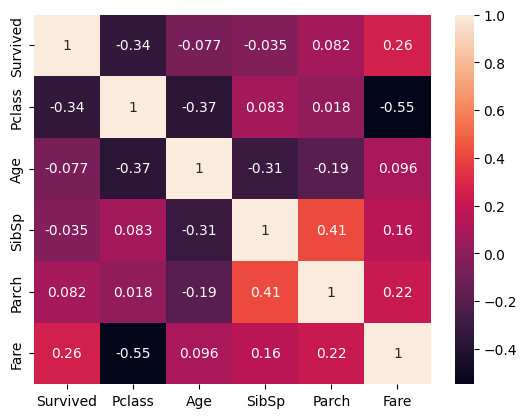

In [4]:
sns.heatmap(data[["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Cabin", "Embarked"]].corr(), annot=True)

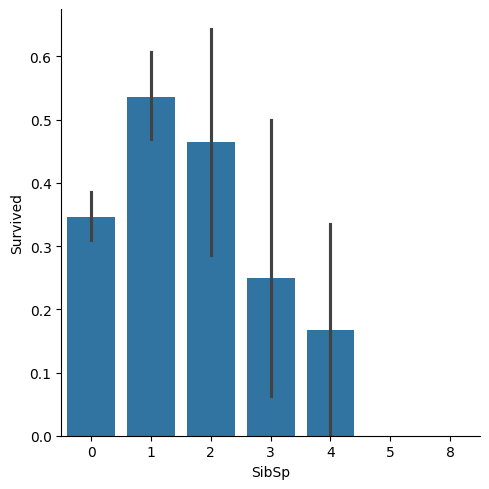

In [5]:
sns.catplot(x="SibSp", y="Survived", data=data, kind="bar") #SibSp is Siblings/Spouse of a person

#### so here we see that people with less Siblings/spouse had a better chance of survival as they could save themselves first - prioritizing themselves over the sibling or the spouse

<Axes: xlabel='Sex', ylabel='Survived'>

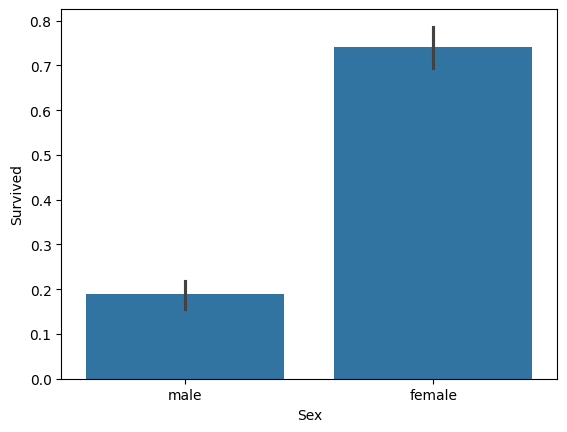

In [6]:
sns.barplot(x="Sex", y="Survived", data=data)

<Axes: xlabel='Pclass', ylabel='Survived'>

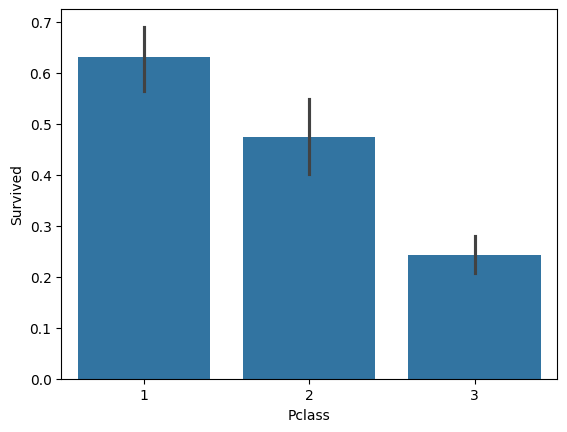

In [7]:
sns.barplot(x="Pclass", y="Survived", data=data)

<Axes: xlabel='Parch', ylabel='Survived'>

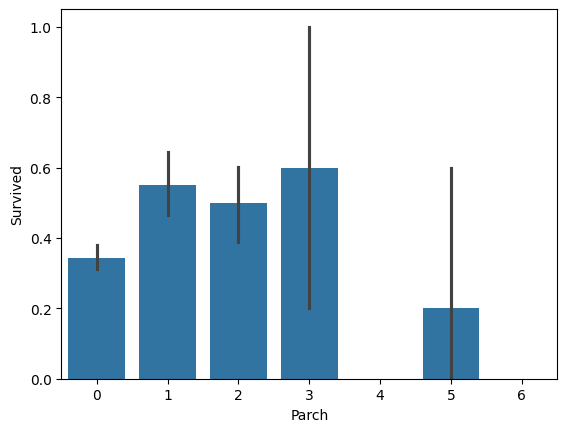

In [8]:
sns.barplot(x="Parch", y="Survived", data=data) #Parch stands for Parents/Children

In [9]:
data["Embarked"].isnull().sum()

2

In [10]:
data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
data["Embarked"] = data["Embarked"].fillna("Q")

<Axes: xlabel='Embarked', ylabel='Survived'>

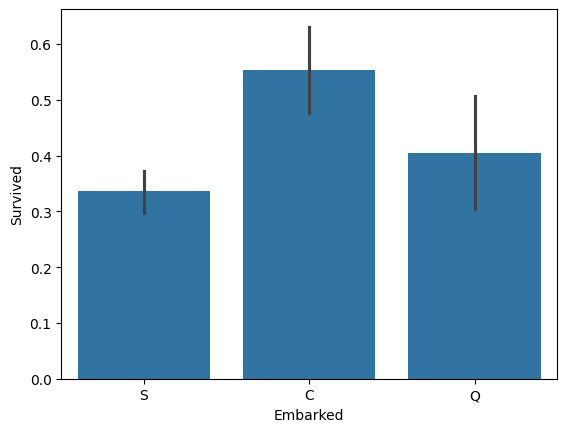

In [12]:
sns.barplot(x="Embarked", y="Survived", data=data) #Embarked stands for the port from where the passengers have onboarded

<Axes: xlabel='Embarked', ylabel='Survived'>

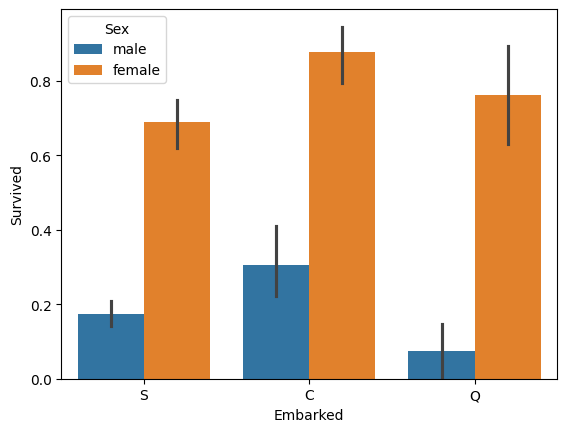

In [13]:
sns.barplot(x="Embarked", y="Survived", data=data, hue="Sex") #Embarked stands for the port from where the passengers have onboarded

#### we observe that passengers onborading from "C" had the highest rate of survival because the majority of it were women

## Preparing the DATA

In [14]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [15]:
data.info() #we observe that there are 177 missing values in age column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
mean = data["Age"].mean()
std = data["Age"].std()
is_null = data["Age"].isnull().sum()

In [17]:
randage = np.random.randint(mean-std, mean+std, size=is_null)

In [18]:
randage

array([43, 29, 36, 18, 26, 29, 40, 17, 42, 24, 27, 21, 29, 37, 23, 43, 20,
       30, 38, 40, 31, 26, 38, 15, 27, 25, 15, 24, 40, 34, 33, 26, 40, 34,
       15, 21, 22, 22, 31, 26, 15, 39, 34, 40, 27, 36, 19, 18, 38, 24, 29,
       29, 41, 36, 30, 23, 29, 26, 18, 17, 41, 30, 42, 33, 32, 16, 37, 23,
       26, 30, 32, 19, 39, 33, 30, 33, 43, 20, 28, 20, 38, 24, 18, 32, 43,
       37, 21, 24, 25, 25, 34, 24, 41, 15, 17, 21, 39, 33, 43, 42, 25, 29,
       28, 25, 38, 36, 23, 32, 43, 24, 36, 22, 30, 19, 32, 35, 25, 36, 17,
       33, 23, 32, 34, 36, 20, 18, 18, 36, 20, 27, 30, 18, 32, 35, 22, 24,
       42, 24, 20, 36, 24, 39, 33, 22, 15, 40, 32, 29, 41, 17, 18, 31, 25,
       27, 40, 16, 34, 42, 42, 27, 40, 29, 31, 32, 23, 39, 18, 38, 37, 34,
       26, 42, 20, 36, 37, 21, 15])

In [19]:
a = data["Age"].copy()

In [20]:
a[np.isnan(a)] = randage
data["Age"] = a

In [21]:
data["Age"].isnull().sum()

0

In [22]:
genders = {"male" : 1, "female":0}
data["Sex"] = data["Sex"].map(genders)

In [23]:
ports = {"S":1, "Q":2, "C":3}
data["Embarked"] = data["Embarked"].map(ports)

In [24]:
data.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)

In [25]:
data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,0,38.0,1,0,71.2833,3
2,1,3,0,26.0,0,0,7.9250,1
3,1,1,0,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,1
5,0,3,1,43.0,0,0,8.4583,2
6,0,1,1,54.0,0,0,51.8625,1
7,0,3,1,2.0,3,1,21.0750,1
8,1,3,0,27.0,0,2,11.1333,1
9,1,2,0,14.0,1,0,30.0708,3


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [27]:
x = data.drop(["Survived"], axis=1)
y = data["Survived"]

In [28]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,1
1,1,0,38.0,1,0,71.2833,3
2,3,0,26.0,0,0,7.9250,1
3,1,0,35.0,1,0,53.1000,1
4,3,1,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,1
887,1,0,19.0,0,0,30.0000,1
888,3,0,15.0,1,2,23.4500,1
889,1,1,26.0,0,0,30.0000,3


In [29]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3)

In [32]:
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()

In [33]:
scxtrain = scx.fit_transform(xtrain)
scxtest = scx.transform(xtest)

In [34]:
lgregressor = LogisticRegression()

In [35]:
knn = KNeighborsClassifier()

In [36]:
rf = RandomForestClassifier()

In [37]:
dt = DecisionTreeClassifier()

In [38]:
svc = SVC()

In [39]:
lgregressor.fit(xtrain, ytrain)
knn.fit(xtrain, ytrain)
rf.fit(xtrain, ytrain)
dt.fit(xtrain, ytrain)
svc.fit(xtrain, ytrain)

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC()

In [40]:
y1 = lgregressor.predict(xtest)
y2 = knn.predict(xtest)
y3 = rf.predict(xtest)
y4 = dt.predict(xtest)
y5 = svc.predict(xtest)

In [41]:
from sklearn.metrics import mean_squared_error

In [42]:
l1 = mean_squared_error(y1, ytest)
l2 = mean_squared_error(y2, ytest)
l3 = mean_squared_error(y3, ytest)
l4 = mean_squared_error(y4, ytest)
l5 = mean_squared_error(y5, ytest)

In [43]:
print("Logistic Regressor :", l1)
print("KNN Regressor :", l2)
print("Random Forest Regressor :", l3)
print("Decision Tree Regressor :", l4)
print("SVC Regressor :", l5)

Logistic Regressor : 0.23507462686567165
KNN Regressor : 0.30970149253731344
Random Forest Regressor : 0.23507462686567165
Decision Tree Regressor : 0.2574626865671642
SVC Regressor : 0.332089552238806


In [44]:
xtest

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
546,2,0,19.0,1,0,26.0000,1
844,3,1,17.0,0,0,8.6625,1
140,3,0,40.0,0,2,15.2458,3
740,1,1,25.0,0,0,30.0000,1
195,1,0,58.0,0,0,146.5208,3
...,...,...,...,...,...,...,...
235,3,0,36.0,0,0,7.5500,1
804,3,1,27.0,0,0,6.9750,1
513,1,0,54.0,1,0,59.4000,3
66,2,0,29.0,0,0,10.5000,1
